# egm115 sea ice practical

## data used

The sea ice data used have come from the [National Snow and Ice Data Center (NSIDC)](https://nsidc.org/sea-ice-today) (Fetterer et al, 2017). They are produced using passive microwave instruments on board a series of earth observation satellites. The temperature data used are based on ERA40 and ECMWF operational reanalysis data, averaged for all grid cells above 80°N by the [Danish Meteorological Institute (DMI)](https://ocean.dmi.dk/arctic/meant80n.uk.php).

To make things easier, I have combined the sea ice data and the meteorological data into a single file, with each row representing one month's observation. The temperature data are the average of the daily values for each month; the number of days above freezing (**nh-npos**) is calculated as the total number of days with a temperature above 0°C for each month.

## references

Fetterer, F., Knowles, K., Meier, W. N., Savoie, M. & Windnagel, A. K. (2017). Sea Ice Index. (G02135, Version 3). Boulder, Colorado USA. National Snow and Ice Data Center. https://doi.org/10.7265/N5K072F8. .

# getting started

Load packages and read in the dataset we'll be using:

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg


sns.set_theme(font_scale=1.2, style="white")
sns.set_style('ticks')

sea_ice = pd.read_csv('sea_ice_data.csv')

Add `date`, `season`, and `grp_id` as variables for later analysis:

In [ ]:
# add a date for time series analysis
sea_ice['date'] = pd.to_datetime({'year': sea_ice['year'], 'month': sea_ice['month'], 'day': 1})

seasons = ['winter'] * 2 + ['spring'] * 3 + ['summer'] * 3 + ['autumn'] * 3 + ['winter']
months = range(1, 13)
names = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# add a variable for seasonal analysis
sea_ice['season'] = sea_ice['month'].map(dict(zip(months, seasons)))

# for being able to get seasonal trends over time
sea_ice['grp_id'] = (sea_ice['season'] != sea_ice['season'].shift()).cumsum()

# questions

## general
First, think about these two questions about the datasets, before you even start looking at the datasets. They might require some additional research (i.e., clicking on the links provided and reading the documentation), but it's difficult to analyze something if you don't know anything about how it was produced.

1. **How are these data obtained?** These are obtained using passive microwave instruments on board a series of satellites.
2. **What is the difference between "extent" and "area"?** "extent" is calculated as the total area of grid cells where there is at least 15% sea ice concentration in the grid cell, while "area" is calculated as the total area covered by sea ice.

As you are looking at the **data-related** and **interpretation** questions below, try to keep the following questions in mind:

1. What software should I consider using to help me answer these questions?
2. Are there any months with missing data? If so, what should we do with these?
3. What type of visualization would work best to help me answer this question?
4. What step(s) do I need to do, in order to be able to answer this question?
5. Is there anything that I don't know (or that I don't remember) that I might need to check or ask about?

## data-related

Using the northern hemisphere sea ice data, try to answer the following questions:

1. What month(s) have the maximum extent (or area), on average? In what month do you typically start to see ice extent/area start to decline?
2. What month(s) have the most variability in sea ice extent in the northern hemisphere? Is it the same for sea ice area?
3. Which season has the steepest trend in sea ice extent over time?
4. How many standard deviations from the 1981-2010 average was the lowest recorded extent?

Now, compare the sea ice extent data with the temperature data provided (**nh-temp** and **nh-npos**). 

1. What month(s) have the maximum (and minimum) temperature, on average?
2. What month(s) are the most variable in terms of temperature?
3. Do you see the steepest trend in temperature in the same season as for sea ice extent/area? Are there any seasons without a trend?
4. Is there a trend in the annual number of days with the temperature above freezing?
5. Which correlation is stronger - the correlation between annually averaged sea ice extent and temperature, or between sea ice area and temperature?

## interpretation

Using your answers from the **data-related** questions above, think about the following question:

- What do you think all of your results can tell you about the most important driver(s) of change in sea ice extent in the northern hemisphere over the satellite era (since 1978)?

# what month(s) are most variable?

Create boxplots showing the variability by month for both northern hemisphere extent and northern hemisphere area - this will show us what months have the most variability (largest boxes), but also what months have the lowest/highest values on average.

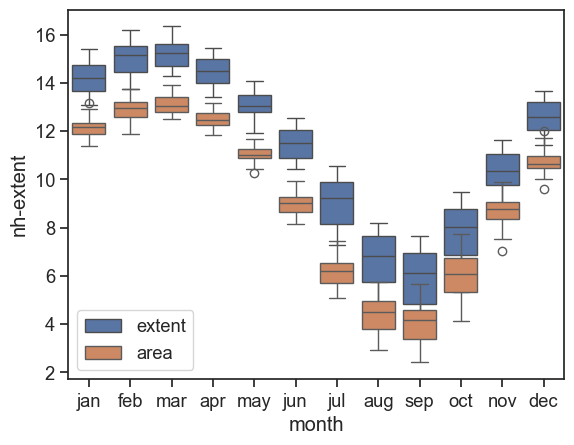

In [ ]:
fig, ax = plt.subplots(1, 1)
sns.boxplot(data=sea_ice, x='month', y='nh-extent', ax=ax, label='extent')
sns.boxplot(data=sea_ice, x='month', y='nh-area', ax=ax, label='area')

ax.legend(loc='lower left')
_ = ax.set_xticks(range(0, 12), names)

Or, we can also look at a table of descriptive statistics for each month:

In [ ]:
descriptives = sea_ice.groupby('month')['nh-extent'].describe()
descriptives.index = names

descriptives = descriptives.T # transpose the table so that the months are columns
descriptives.loc['iqr'] = descriptives.loc['75%'] - descriptives.loc['25%'] # add IQR as a descriptive statistic

descriptives # show the table of descriptive statistics

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
count,46.000000,47.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,47.000000,46.000000
mean,14.159087,15.031362,15.216652,14.491913,13.099543,11.499674,9.033304,6.713261,5.899391,7.787239,10.397766,12.605370
std,0.614168,0.630808,0.564625,0.558054,0.505545,0.624021,0.955147,1.050195,1.164956,1.185661,0.770609,0.644553
min,13.077000,13.745000,14.290000,13.434000,11.924000,10.413000,7.294000,4.723000,3.566000,5.334000,8.658000,11.418000
25%,13.651250,14.465500,14.697750,14.016000,12.780250,10.901250,8.144750,5.755000,4.832750,6.842000,9.772000,12.036750
50%,14.192000,15.155000,15.242500,14.504000,13.030000,11.519500,9.231000,6.826000,6.098000,8.043500,10.343000,12.598000
75%,14.724000,15.528500,15.594500,14.980500,13.505250,12.067000,9.896000,7.636250,6.957250,8.776500,11.050000,13.193000
max,15.414000,16.175000,16.342000,15.466000,14.073000,12.530000,10.570000,8.186000,7.667000,9.484000,11.645000,13.667000
iqr,1.072750,1.063000,0.896750,0.964500,0.725000,1.165750,1.751250,1.881250,2.124500,1.934500,1.278000,1.156250


# compare trends between seasons

Create a scatter plot of sea ice extent and area over time, colored/grouped by season:

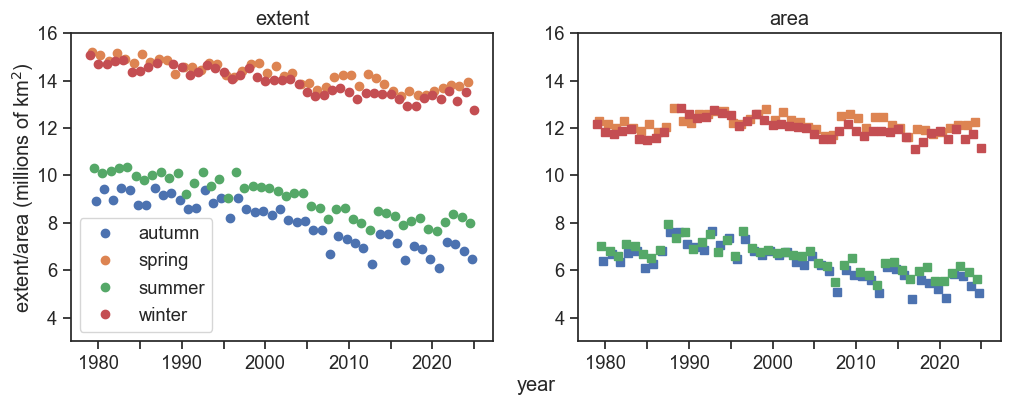

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
axs = fig.subplots(1, 2)

for seas, df in sea_ice.groupby('season'):
    grouped = df.groupby('grp_id')
    valid = grouped['nh-extent'].count() == 3

    area = grouped['nh-area'].mean()[valid]
    extent = grouped['nh-extent'].mean()[valid]

    dates = grouped['date'].mean()[valid]

    axs[0].plot(dates, extent, 'o', label=seas)
    axs[1].plot(dates, area, 's', label=seas)

for _ax in axs:
    _ax.set_ylim(3, 16)    

    for label in _ax.get_xticklabels()[::2]:
        label.set_visible(False)

axs[1].set_ylim(3, 16)

axs[0].set_title('extent')
axs[1].set_title('area')

axs[0].legend()

plt.setp(ax.spines.values(), visible=False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('year', labelpad=25)
_ = ax.set_ylabel('extent/area (millions of km$^2$)', labelpad=25)

Calculate regression coefficients for each season, for both extent and area:

In [ ]:
results = []

for seas, df in sea_ice.groupby('season'):
    for var in ['nh-extent', 'nh-area']:
        valid = df.groupby('grp_id')[var].count() == 3

        xdata = df.groupby('grp_id')['date'].mean()[valid].dt.year
        ydata = df.groupby('grp_id')[var].mean()[valid]
    
        res = pg.linear_regression(xdata, ydata, alpha=0.01) # add the result to the results dict, with season as the key
        res['season'] = seas
        res['variable'] = var

        results.append(res)

results = pd.concat(results)
results = results.loc[results['names'] == 'date'].drop(columns=['names']).set_index(['season', 'variable'])

results.sort_values('coef') # show the coefficients, sorted from most to least negative

,,coef,se,T,pval,r2,adj_r2,CI[0.5%],CI[99.5%]
season,variable,,,,,,,,
autumn,nh-extent,-0.069369,0.004512,-15.375548,2.616120e-19,0.843086,0.839519,-0.081515,-0.057222
summer,nh-extent,-0.059923,0.003530,-16.976387,6.200144e-21,0.867549,0.864539,-0.069426,-0.050420
autumn,nh-area,-0.042589,0.005618,-7.580561,1.626487e-09,0.566353,0.556497,-0.057714,-0.027463
winter,nh-extent,-0.042226,0.002413,-17.500348,1.926891e-21,0.874380,0.871525,-0.048722,-0.035730
spring,nh-extent,-0.034778,0.002760,-12.599404,3.398968e-16,0.782979,0.778046,-0.042210,-0.027347
summer,nh-area,-0.034567,0.004313,-8.014556,4.520850e-10,0.599004,0.589679,-0.046191,-0.022943
winter,nh-area,-0.012166,0.004047,-3.006183,4.358898e-03,0.170393,0.151538,-0.023062,-0.001270
spring,nh-area,-0.005717,0.003420,-1.671920,1.016379e-01,0.059735,0.038365,-0.014924,0.003489


# how anomalous was the minimum extent?

First, let's calculate the mean and standard deviation for each month, using the 1981-2010 values. We can then find the month and year of the minimum extent:

In [ ]:
climate_grp = sea_ice.loc[sea_ice['year'].isin(range(1981, 2011))].groupby('month')

climate_avg = climate_grp['nh-extent'].mean()
climate_var = climate_grp['nh-extent'].std()

min_val = sea_ice['nh-extent'].idxmin() # get the location of the minimum extent
min_year = sea_ice.loc[min_val, 'year'] # get the year of the minimum extent
min_month = sea_ice.loc[min_val, 'month'] # get the month of the minimum extent

print(f"Minimum monthly extent was in {names[min_month-1]} {min_year}")

Minimum monthly extent was in sep 2012


Now, look at a plot that shows the 1981-2010 mean (± 2σ) for each month. The year with the lowest extent (2012) is plotted in red, and the lowest observed extent is plotted as a red star. Compare to the plot shown on [Charctic](https://nsidc.org/sea-ice-today/sea-ice-tools/charctic-interactive-sea-ice-graph), which plots the median, interquartile range, and interdecile range for each date.

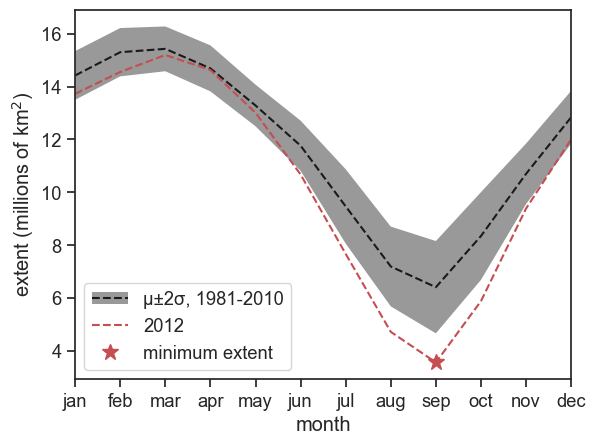

In [ ]:
fig, ax = plt.subplots(1, 1)

band = ax.fill_between(climate_avg.index, climate_avg - 2*climate_var, climate_avg + 2*climate_var, fc='0.5', ec='none', alpha=0.8, label='±2σ')
mean, = ax.plot(climate_avg.index, climate_avg, 'k--', label='µ')

minyear, = ax.plot(sea_ice.loc[sea_ice['year'] == min_year, 'month'], sea_ice.loc[sea_ice['year'] == min_year, 'nh-extent'], 'r--', label='2012')
minval, = ax.plot(sea_ice.loc[min_val, 'month'], sea_ice.loc[min_val, 'nh-extent'], 'r*', ms=12, label='minimum extent')

_ = ax.set_xticks(range(1, 13), names)
ax.set_xlim(1, 12)

ax.set_xlabel('month')
ax.set_ylabel('extent (millions of km$^2$)')
_ = ax.legend([(band, mean), minyear, minval], ['µ±2σ, 1981-2010', '2012', 'minimum extent'], loc='lower left')

Calculate the z-score for the minimum extent:

In [ ]:
z_score = (sea_ice.loc[min_val, 'nh-extent'] - climate_avg.loc[min_month]) / climate_var.loc[min_month]
print(f"The z-score for the minimum month on record is {z_score:.2f}")

The z-score for the minimum month on record is -3.26


# temperature

## variability

We'll look at a box plot, just like we did for the sea ice extent and area:

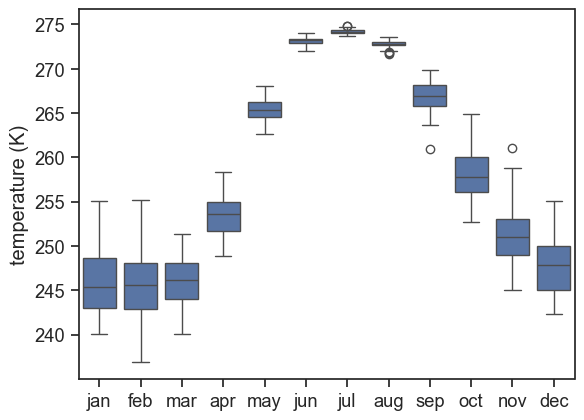

In [ ]:
fig, ax = plt.subplots(1, 1)
sns.boxplot(data=sea_ice, x='month', y='nh-temp', ax=ax)

ax.set_ylabel('temperature (K)')
ax.set_xlabel('')
_ = ax.set_xticks(range(0, 12), names)

## trend in temperature per season

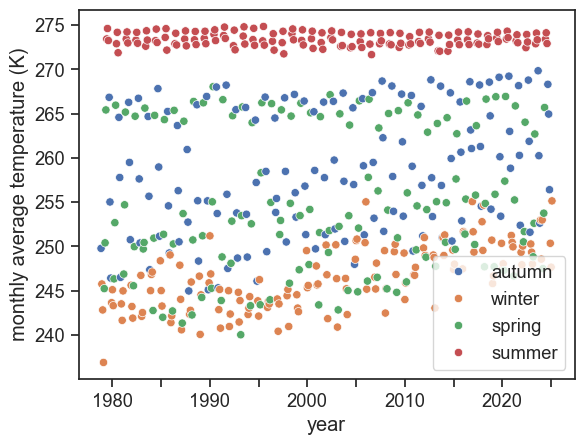

In [ ]:
fig, ax = plt.subplots(1, 1)

sns.scatterplot(data=sea_ice, x='date', y='nh-temp', hue='season')

for label in ax.get_xticklabels()[::2]:
    label.set_visible(False)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels)

ax.set_xlabel('year')
_ = ax.set_ylabel('monthly average temperature (K)')

In [ ]:
results = []

for seas, df in sea_ice.groupby('season'):
    valid = df.groupby('grp_id')['nh-temp'].count() == 3

    xdata = df.groupby('grp_id')['date'].mean()[valid].dt.year
    ydata = df.groupby('grp_id')['nh-temp'].mean()[valid]

    res = pg.linear_regression(xdata, ydata, alpha=0.01) # add the result to the results dict, with season as the key
    res['season'] = seas
    results.append(res)

results = pd.concat(results)
results = results.loc[results['names'] == 'date'].drop(columns=['names']).set_index('season')

results.sort_values('coef') # show the coefficients, sorted from most to least negative

,coef,se,T,pval,r2,adj_r2,CI[0.5%],CI[99.5%]
season,,,,,,,,
summer,-0.004955,0.003239,-1.529768,1.332324e-01,0.050500,0.028921,-0.013675,0.003765
spring,0.062109,0.012664,4.904380,1.321408e-05,0.353445,0.338750,0.028014,0.096204
autumn,0.136924,0.016391,8.353565,1.260309e-10,0.613296,0.604507,0.092795,0.181053
winter,0.176467,0.018732,9.420359,3.262794e-12,0.663534,0.656057,0.126084,0.226849


## trend in number of days above freezing

To look at the change in the number of days above freezing over time, we group/aggregate by year, then take the sum for each year:

In [ ]:
annual = sea_ice.groupby('year')
valid = annual['nh-npos'].count() == 12

annual_pos = annual[['nh-npos']].sum()[valid].reset_index()

Let's look at a scatter plot of the total number of days above freezing for each year:

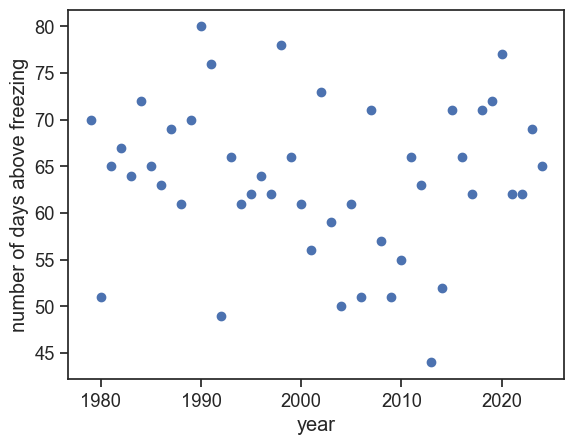

In [ ]:
fig, ax = plt.subplots(1, 1)

ax.plot(annual_pos['year'], annual_pos['nh-npos'], 'o')

_ = ax.set_xlabel('year')
_ = ax.set_ylabel('number of days above freezing')

This looks very flat; to confirm, let's look at a linear regression of the number of days above freezing vs year:

In [ ]:
pg.linear_regression(annual_pos['year'], annual_pos['nh-npos'], alpha=0.01)

,names,coef,se,T,pval,r2,adj_r2,CI[0.5%],CI[99.5%]
0,Intercept,159.684675,183.42123,0.870590,0.388703,0.006192,-0.016395,-334.136317,653.505666
1,year,-0.047980,0.09164,-0.523574,0.603202,0.006192,-0.016395,-0.294700,0.198740


And, to see what month(s) have days above freezing, let's look at a box plot:

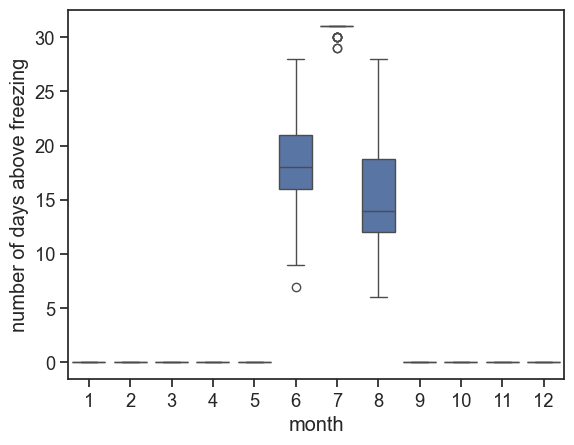

In [ ]:
ax = sns.boxplot(data=sea_ice, x='month', y='nh-npos')
_ = ax.set_ylabel('number of days above freezing')

# correlation between annual sea ice and temperature

To get the correlation between the annual average temperature and sea ice extent/area, we first have to calculate the annual averages:

In [ ]:
annual = sea_ice.groupby('year')
valid = annual['nh-extent'].count() == 12

annual_avg = annual[['nh-extent', 'nh-area', 'nh-temp']].mean()[valid]

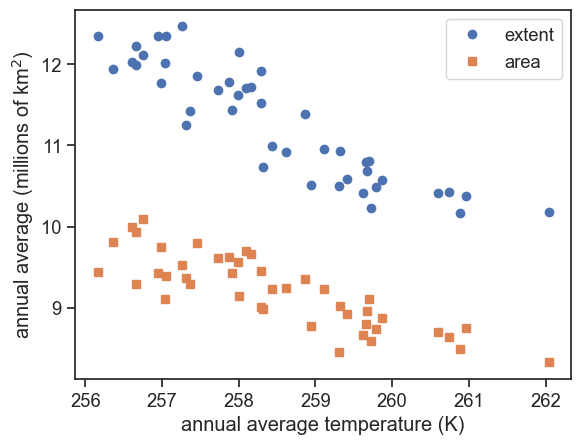

In [ ]:
fig, ax = plt.subplots(1, 1)

ax.plot(annual_avg['nh-temp'], annual_avg['nh-extent'], 'o', label='extent')
ax.plot(annual_avg['nh-temp'], annual_avg['nh-area'], 's', label='area')

ax.set_xlabel('annual average temperature (K)')
ax.set_ylabel('annual average (millions of km$^2$)')

ax.legend(loc='upper right')

The correlation between the annual average temperature and the annual average extent/area:

In [ ]:
annual_avg.corr(method='pearson').drop('nh-temp')['nh-temp']

nh-extent   -0.897648
nh-area     -0.837235
Name: nh-temp, dtype: float64

In [ ]:
annual_avg.corr(method='spearman').drop('nh-temp')['nh-temp']

nh-extent   -0.909616
nh-area     -0.836927
Name: nh-temp, dtype: float64

# synthesis

As a reminder, the question you are ultimately trying to answer is:

> *What do you think all of your results can tell you about the most important driver of change in sea ice extent in the northern hemisphere over the satellite era (since 1978)?*

To summarize, we have seen that:

- The maximum value occurs in February/March on average, for both ice extent and ice area.
- The most variability in ice extent/area occurs in summer and autumn months.
- The strongest decrease in both area and extent has happened during the autumn and winter months.
- The 2012 minimum was 3.26 standard deviations below the 1981-2010 average.
- The highest temperatures are found in summer months (July), while the lowest temperatures are found in winter months (January/February).
- The strongest increase in temperature has happened during the winter and autumn months.
- There is no noticeable trend in the annual number of days with the temperature above freezing.
- The strongest (negative) correlation is between temperature and ice extent.
